#**Лабораторная работа №2**
**Максимов Антон 17ПМИ**

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import random
from collections import defaultdict
from collections import deque
import heapq
from heapq import heappush, heappop
from itertools import count
import math

###**Graph generator**

In [0]:
import random

class Generator():
    def __init__(self):
        self.density = None
        self.Graph = None
        self.pos = None

    def generate_weighted_directed_dense(self, number_of_nodes): #dense
       self.Graph = nx.erdos_renyi_graph(number_of_nodes, 2*number_of_nodes/(3*(number_of_nodes-1)) , seed=123, directed=True,)
       for (u,v,w) in self.Graph.edges(data=True):
          w['weight'] = random.randint(1,500)
       return self.Graph

    def generate_unweighted_undirected_dense(self, number_of_nodes): #dense
       self.Graph = nx.erdos_renyi_graph(number_of_nodes, 2*number_of_nodes/(3*(number_of_nodes-1)) , seed=123, directed=False)
       return self.Graph   

    def generate_grid_graph_undirected_dense(self, number_of_nodes): #dense

       def heuristic(a, b):
        (x1, y1) = a
        (x2, y2) = b
        return float("{0:.1f}".format(abs(x1 - x2) + abs(y1 - y2)))

       self.Graph = nx.erdos_renyi_graph(number_of_nodes, 2*number_of_nodes/(3*(number_of_nodes-1)) , seed=123, directed=False)
       
       coordinates = nx.spring_layout(self.Graph)
       self.pos = coordinates

       for vertice in self.Graph.nodes:
          self.Graph.nodes[vertice]['coordinate'] = coordinates[vertice]

       for (u, v, w) in self.Graph.edges(data=True):
          w['weight'] = heuristic(self.Graph.nodes[u]['coordinate'], self.Graph.nodes[v]['coordinate']) 

       return self.Graph  

    def generate_weighted_directed_sparse(self, number_of_nodes): #sparse
       self.Graph = nx.erdos_renyi_graph(number_of_nodes, 2*3/(number_of_nodes-1) , seed=123, directed=True,)
       for (u,v,w) in self.Graph.edges(data=True):
          w['weight'] = random.randint(1,500)
       return self.Graph

    def generate_unweighted_undirected_sparse(self, number_of_nodes): #sparse
       self.Graph = nx.erdos_renyi_graph(number_of_nodes,  2*3/(number_of_nodes-1) , seed=123, directed=False)
       return self.Graph   

    def generate_grid_graph_undirected_sparse(self, number_of_nodes): #sparse

       def heuristic(a, b):
        (x1, y1) = a
        (x2, y2) = b
        return float("{0:.1f}".format(abs(x1 - x2) + abs(y1 - y2)))

       self.Graph = nx.erdos_renyi_graph(number_of_nodes,  2*3/(number_of_nodes-1) , seed=123, directed=False)
       
       coordinates = nx.spring_layout(self.Graph)
       self.pos = coordinates

       for vertice in self.Graph.nodes:
          self.Graph.nodes[vertice]['coordinate'] = coordinates[vertice]

       for (u, v, w) in self.Graph.edges(data=True):
          w['weight'] = heuristic(self.Graph.nodes[u]['coordinate'], self.Graph.nodes[v]['coordinate']) 

       return self.Graph  

    def generate_gnr(self, number_of_nodes):  
       self.Graph = nx.gnr_graph(number_of_nodes, 0.2)
       for (u,v,w) in self.Graph.edges(data=True):
        w['weight'] = random.randint(1,100)
       return self.Graph

    def generate_cn(self, number_of_nodes):
        self.Graph = nx.erdos_renyi_graph(number_of_nodes, 2*3/(number_of_nodes-1), seed=123, directed=False)
        self.density = nx.density(self.Graph)
        return self.Graph

    def show(self):
        if self.pos is None:
          self.pos=nx.circular_layout(self.Graph)
        nx.draw(self.Graph,self.pos, with_labels=True,  connectionstyle='arc3, rad = 0.1')
        labels = nx.get_edge_attributes(self.Graph,'weight')
        nx.draw_networkx_edge_labels(self.Graph,self.pos,edge_labels=labels, label_pos=0.2)  
        plt.show()  

    def draw(self):
        nx.draw(self.Graph, with_labels=True)
        plt.show()    

###**Floyd-Warshall Algorithm**

In [0]:
def floyd_warshall(Graph):

    distance = defaultdict(lambda : defaultdict(lambda: float('inf')))

    for s in Graph:
        distance[s][s] = 0  
    paths = defaultdict(dict)
    
    for s,t,wei in Graph.edges(data=True):
        weight = wei.get('weight', 1.0)
        distance[s][t] = min(weight, distance[s][t])
        paths[s][t] = s

    for u in Graph:
        for s in Graph:
            for t in Graph:
                if distance[s][t] > distance[s][u] + distance[u][t]:
                    distance[s][t] = distance[s][u] + distance[u][t]
                    paths[s][t] = paths[u][t]
    return dict(distance) #, dict(paths)

def shortest_path(paths, source, target):

    intermediate = paths[source][target]
    path = [target]

    while intermediate != source:
      path.append(intermediate)
      intermediate = paths[source][intermediate]

    path.append(source)
    path.reverse()

    return path    

**EXAMPLE**

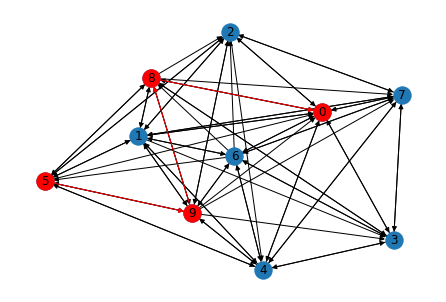

In [0]:
Gen = Generator()
Graph = Gen.generate_weighted_directed(10)
paths = floyd_warshall(Graph)
path = shortest_path(paths, 5, 0) #start, end
pos = nx.spring_layout(Graph, 3, scale=2)
path_edges = list(zip(path, path[1:]))
nx.draw(Graph,pos,with_labels=True)
nx.draw_networkx_nodes(Graph,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(Graph,pos,edgelist=path_edges,edge_color='r',width=1)
#plt.axis('equal')
plt.show()

###**Johnson`s algorithm**

In [0]:
def johnson(Graph):
    dist = {vertice: 0 for vertice in Graph}
    pred = {vertice: None for vertice in Graph}
    distance_bellman = BF_relaxation(Graph, pred, dist, Graph.nodes())[1]
    get_weight = lambda u, v: (distance_bellman[u] - distance_bellman[v])                          
    paths = {v: dijkstra(Graph, v, get_weight)[0] for v in Graph}
    return paths

**EXAMPLE**

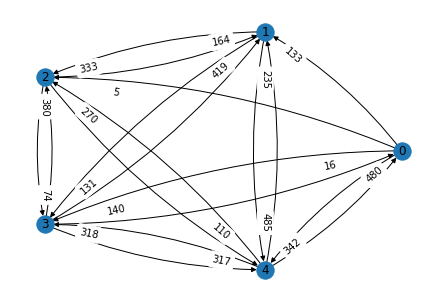

In [77]:
Gen = Generator()
Graph = Gen.generate_weighted_directed_dense(5)
Gen.show()

In [80]:
paths = johnson(Graph)
reconstruct_path(paths[1], 1, 4)

[1, 3, 0, 2, 4]

**Проверяем через библиотечную функцию**

In [81]:
nx.johnson(Graph, weight='weight')[1][4]

[1, 3, 0, 2, 4]

In [0]:
path = johnson(Graph)[1][0]

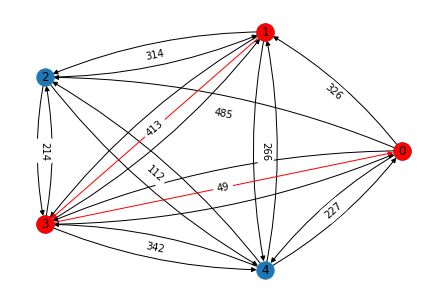

In [106]:
pos = Gen.pos
path_edges = list(zip(path, path[1:]))
nx.draw(Graph,pos,with_labels=True, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_nodes(Graph,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(Graph,pos,edgelist=path_edges,edge_color='r',width=1)
labels = nx.get_edge_attributes(Graph,'weight')
nx.draw_networkx_edge_labels(Graph,pos,edge_labels=labels)  
plt.show()

In [0]:
def dijkstra(graph, start, get_weight):
    p_queue = PriorityQueue()
    p_queue.put(start, 0)
    paths = {}
    costs = {}
    paths[start] = None
    costs[start] = 0
    
    while not p_queue.empty():
        current = p_queue.get()
        
        #if current == goal:
            #break
        
        for next in graph.neighbors(current):
            new_cost = costs[current] + graph[current][next]['weight'] + get_weight(current, next)
            if next not in costs or new_cost < costs[next]:
                costs[next] = new_cost
                priority = new_cost
                p_queue.put(next, priority)
                paths[next] = current
    
    return paths, costs

In [0]:
def reconstruct_path(paths, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = paths[current]
    path.append(start) 
    path.reverse() 
    return path 

In [0]:
def BF_relaxation(Graph, pred, dist, source):
    G_succ = Graph.succ 
    inf = float('inf')
    n = len(Graph)
    count = {}
    queue = deque(source)
    in_queue = set(source)
    while queue:
        u = queue.popleft()
        in_queue.remove(u)
        if pred[u] not in in_queue:
            dist_u = dist[u]
            for v, e in G_succ[u].items():
                dist_to_v = dist_u + e.get('weight', 1)
                if dist_to_v < dist.get(v, inf):
                    if v not in in_queue:
                        queue.append(v)
                        in_queue.add(v)
                        count_v = count.get(v, 0) + 1
                        if count_v == n:
                            print("Найден отрицательный цикл")
                        count[v] = count_v
                    dist[v] = dist_to_v
                    pred[v] = u

    return pred, dist

###**Seidel`s algorithm**

Seidel's algorithm is an algorithm designed by Raimund Seidel in 1992 for the all-pairs-shortest-path problem for **undirected, unweighted**, connected graphs. (Wiki)

In [0]:
def to_matrix(Graph):
  return np.array(nx.adjacency_matrix(Graph).todense(), dtype=np.float64)

def seidel_algorithm(A):
  n = A.shape[0]
  Z = np.matmul(A, A)
  #B = np.matrix([[1 if i != j and (A[i][j] == 1 or Z[i][j] > 0) else 0 for j in range(n)] for i in range(n)]) 
  B = 1 * np.logical_or(A == 1, Z > 0) #Тоже самое
  B -= np.diag(np.diag(B))
  if (A == B).all():
    return (A)
  Dist = seidel_algorithm(B) #Матрица расстояний
  Graph = nx.from_numpy_array(A)

  Z = np.diag([degree for (n, degree) in list(Graph.degree())]) #Так
  X = 1 * (np.matmul(Dist, A) < (Dist * np.diag(Z)))
  Dist = (2 * Dist - X)

  #X = np.matmul(Dist, A) # Или так
  #degree = [sum(A[i][j] for j in range(n)) for i in range(n)]
  #Dist = np.matrix([[2 * Dist[i][j] if X[i][j] >= Dist[i][j] * degree[j] else 2 * Dist[i][j] - 1 for j in range(n)] for i in range(n)])

  return Dist

**EXAMPLE**

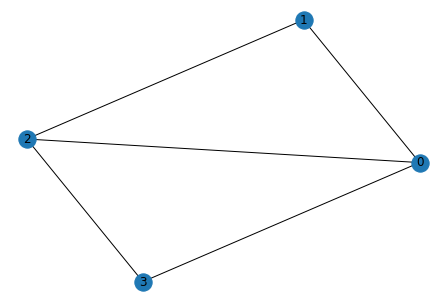

In [0]:
Gen = Generator()
Graph = Gen.generate_unweighted_undirected(4)
Gen.draw()

**Из вершины 3 в вершину 1, стоимость пути : 2**

In [0]:
seidel_algorithm(to_matrix(Graph))

array([[0, 1, 1, 1],
       [1, 0, 1, 2],
       [1, 1, 0, 1],
       [1, 2, 1, 0]])

###**A-Star**

In [0]:
class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

In [0]:
def euclidean_heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return float("{0:.1f}".format((math.sqrt(math.pow((x2 - x1),2) + math.pow((y2 - y1),2)))))

def heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return abs(x1 - x2) + abs(y1 - y2)

def a_star_search(graph, start):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    paths = {}
    costs_to_vertice = {}
    paths[start] = None
    costs_to_vertice[start] = 0
    
    while not frontier.empty():
        current = frontier.get()
        #print(current)
        #if current == goal:
           #break
        
        for next in graph.neighbors(current):
            new_cost = costs_to_vertice[current] + graph[current][next]['weight']
            if next not in costs_to_vertice or new_cost < costs_to_vertice[next]:
                costs_to_vertice[next] = new_cost
                priority = new_cost + euclidean_heuristic(graph.nodes[current]['coordinate'], graph.nodes[next]['coordinate'])
                frontier.put(next, priority)
                paths[next] = current
    
    return paths, costs_to_vertice

In [0]:
def a_star(Graph):
  all_paths = {v: a_star_search(Graph, v)[0] for v in Graph}
  return all_paths 

In [0]:
def reconstruct_path2(paths, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = paths[current]
    path.append(start) 
    path.reverse() 
    return path

**EXAMPLE**

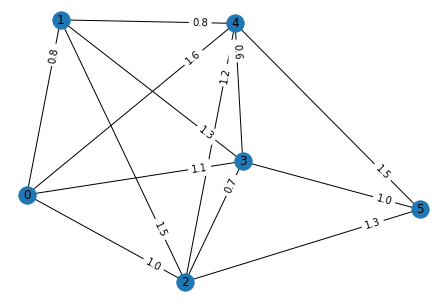

In [88]:
Gen = Generator()
Graph = Gen.generate_grid_graph_undirected_dense(6)
Gen.show()

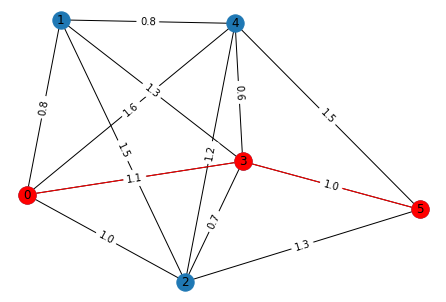

In [95]:
paths = a_star(Graph)
path = reconstruct_path(paths[0], 0, 5)
pos = Gen.pos
path_edges = list(zip(path, path[1:]))
nx.draw(Graph,pos,with_labels=True)
nx.draw_networkx_nodes(Graph,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(Graph,pos,edgelist=path_edges,edge_color='r',width=1)
labels = nx.get_edge_attributes(Graph,'weight')
nx.draw_networkx_edge_labels(Graph,pos,edge_labels=labels)  
plt.show()

###**Stress-tests**

**Тестируем на разреженных графах все 4 алгоритма, проверяем с помощью библиотечных функций**

In [0]:
import time
import progressbar

widgets=[
    ' [', progressbar.Timer(), '] ',
    progressbar.Bar(marker='█',),
    ' (', progressbar.ETA(), ') ',
]


**Floyd-Warshall Algorithm**

In [49]:
Errors = 0

for number_of_nodes in progressbar.progressbar(range(100,1000,50), widgets=widgets):
    Gen = Generator()
    Graph = Gen.generate_weighted_directed_sparse(number_of_nodes)

    if (floyd_warshall(Graph) != nx.floyd_warshall(Graph, weight = 'weight')):
        Errors+=1
print("\n Ошибок: ", Errors)          

 [Elapsed Time: 0:28:31] |██████████████████████████████████| (Time:  0:28:31) 



 Ошибок:  0


**Johnson`s algorithm**

In [54]:
Errors = 0

for number_of_nodes in progressbar.progressbar(range(100,1500,50), widgets=widgets):
    Gen = Generator()
    Graph = Gen.generate_weighted_directed_sparse(number_of_nodes)
    paths = johnson(Graph)
    path = reconstruct_path(paths[0], 0, number_of_nodes-1)
    if (path != nx.johnson(Graph, weight='weight')[0][number_of_nodes-1]):
        Errors+=1
print("\n Ошибок: ", Errors)

 [Elapsed Time: 0:11:03] |██████████████████████████████████| (Time:  0:11:03) 



 Ошибок:  0


**Seidel`s algorithm**

In [52]:
Errors = 0

for number_of_nodes in progressbar.progressbar(range(500,1500,50), widgets=widgets):
    Gen = Generator()
    Graph = Gen.generate_unweighted_undirected_sparse(number_of_nodes)
    mat = seidel_algorithm(to_matrix(Graph))
    if (nx.astar_path_length(Graph, 0, number_of_nodes-1)!=mat[0][number_of_nodes-1]):
        Errors+=1
print("\n Ошибок: ", Errors)

 [Elapsed Time: 0:07:49] |██████████████████████████████████| (Time:  0:07:49) 



 Ошибок:  0


**A-Star**

In [62]:
Errors = 0

for number_of_nodes in progressbar.progressbar(range(4,500,2), widgets=widgets):
    Gen = Generator()
    Graph = Gen.generate_grid_graph_undirected_sparse(number_of_nodes)
    paths = a_star(Graph)
    path = reconstruct_path2(paths[0], 0, number_of_nodes-1)

    if (nx.astar_path(Graph, 0, number_of_nodes-1)!=path):
        Errors+=1
print("\n Ошибок: ", Errors)

 [Elapsed Time: 0:08:18] |██████████████████████████████████| (Time:  0:08:18) 



 Ошибок:  47


**В данном случае такое кол-во несовпадений обусловено тем, что A* находит какой-то путь, и этот путь необязательно является кратчайшим, то есть алгоритмы находят разные "кратчайшие пути"** https://habr.com/ru/post/444828/ 
https://ru.wikipedia.org/wiki/A*

###**Graphics**

**Будем тестировать на плотных и разареженных графах от 10 до 500 вершин, так как очень долго считается для плотных графов.**



**Замечание: все алгоритмы находят все пути от каждой вершины до каждой, включая A-Star, хотя он лучше работает при нахождении пути от одной вершины до другой**

In [17]:
nodes = []
time_floyd_dense = []
time_floyd_sparse = []
time_johnson_dense = []
time_johnson_sparse = []
time_seidel_dense = []
time_seidel_sparse = []
time_astar_dense = []
time_astar_sparse = []

for n in progressbar.progressbar(range(10,500,10), widgets=widgets):

  Gen = Generator()
  
  Graph = Gen.generate_weighted_directed_dense(n)

  t0 = time.clock() 
  floyd_warshall(Graph)
  t1 = time.clock() - t0
  time_floyd_dense.append(t1)

  t0 = time.clock() 
  johnson(Graph)
  t1 = time.clock() - t0
  time_johnson_dense.append(t1)
  
  Graph = Gen.generate_weighted_directed_sparse(n) 

  t0 = time.clock() 
  floyd_warshall(Graph)
  t1 = time.clock() - t0
  time_floyd_sparse.append(t1)

  t0 = time.clock() 
  johnson(Graph)
  t1 = time.clock() - t0
  time_johnson_sparse.append(t1)

  Graph = Gen.generate_unweighted_undirected_dense(n)

  t0 = time.clock() 
  seidel_algorithm(to_matrix(Graph))
  t1 = time.clock() - t0
  time_seidel_dense.append(t1)

  Graph = Gen.generate_unweighted_undirected_sparse(n)

  t0 = time.clock() 
  seidel_algorithm(to_matrix(Graph))
  t1 = time.clock() - t0
  time_seidel_sparse.append(t1)
  
  Graph = Gen.generate_grid_graph_undirected_dense(n)

  t0 = time.clock() 
  a_star(Graph)
  t1 = time.clock() - t0
  time_astar_dense.append(t1)

  Graph = Gen.generate_grid_graph_undirected_sparse(n)

  t0 = time.clock() 
  a_star(Graph)
  t1 = time.clock() - t0
  time_astar_sparse.append(t1)

  nodes.append(n)

 [Elapsed Time: 3:57:37] |██████████████████████████████████| (Time:  3:57:37) 


**4 часа спустя...**

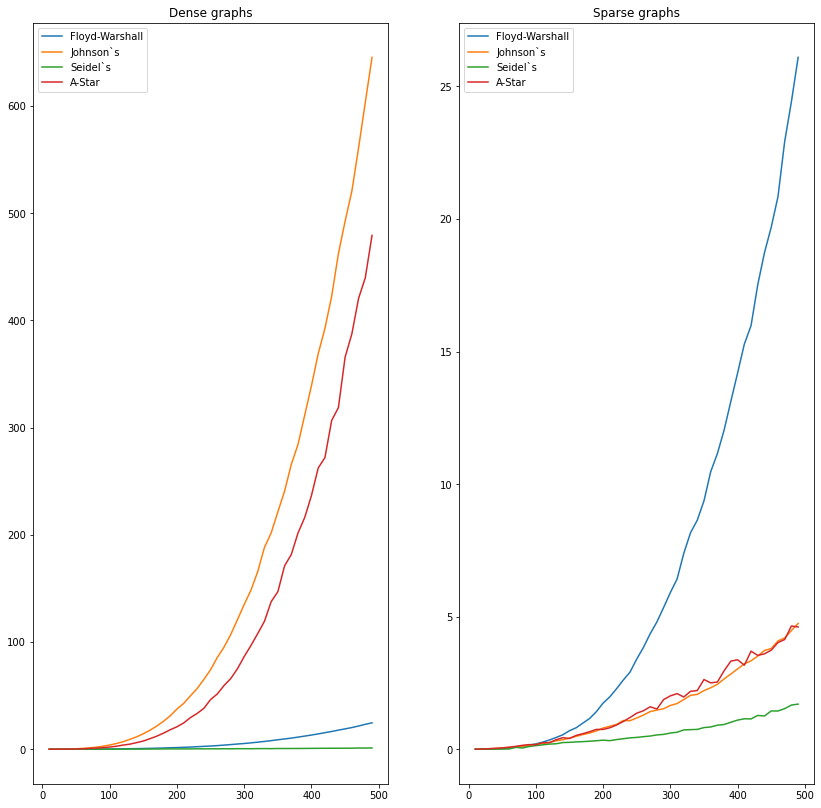

In [18]:
fig = plt.figure(figsize=(14, 14))

plt.subplot(1, 2, 1)
plt.plot(nodes, time_floyd_dense)
plt.plot(nodes, time_johnson_dense)
plt.plot(nodes, time_seidel_dense)
plt.plot(nodes, time_astar_dense)
plt.title('Dense graphs')
labels1 = ['Floyd-Warshall','Johnson`s','Seidel`s','A-Star']
plt.legend(labels1)

plt.subplot(1, 2, 2)
plt.plot(nodes, time_floyd_sparse)
plt.plot(nodes, time_johnson_sparse)
plt.plot(nodes, time_seidel_sparse)
plt.plot(nodes, time_astar_sparse)
plt.title('Sparse graphs')
labels2 = ['Floyd-Warshall','Johnson`s','Seidel`s','A-Star']
plt.legend(labels2)


plt.show()

**Как мы видим, для разреженных графов алгоритм Джонсона ведет себя асимптотически быстрее алгоритма Флойда-Уоршелла.**

**На малых графах: (просто тесты)**

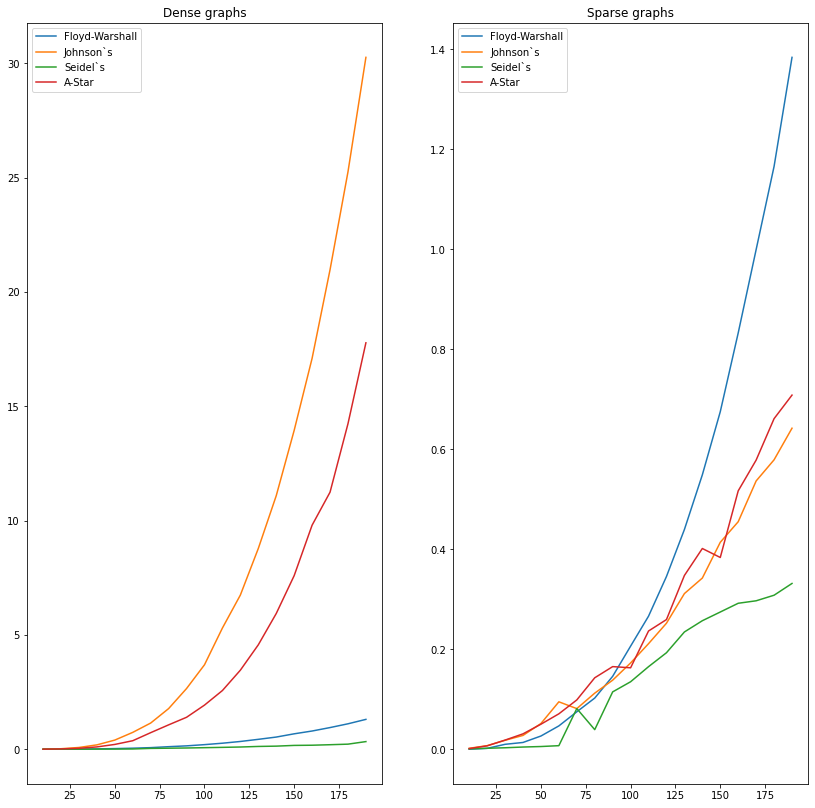

In [97]:
fig = plt.figure(figsize=(14, 14))

plt.subplot(1, 2, 1)
plt.plot(nodes, time_floyd_dense)
plt.plot(nodes, time_johnson_dense)
plt.plot(nodes, time_seidel_dense)
plt.plot(nodes, time_astar_dense)
plt.title('Dense graphs')
labels1 = ['Floyd-Warshall','Johnson`s','Seidel`s','A-Star']
plt.legend(labels1)

plt.subplot(1, 2, 2)
plt.plot(nodes, time_floyd_sparse)
plt.plot(nodes, time_johnson_sparse)
plt.plot(nodes, time_seidel_sparse)
plt.plot(nodes, time_astar_sparse)
plt.title('Sparse graphs')
labels2 = ['Floyd-Warshall','Johnson`s','Seidel`s','A-Star']
plt.legend(labels2)


plt.show()